In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Parameters Vector

Load, merge, normalization vector of parameters.

In [127]:
# Loading each csv file
df1 = pd.read_csv('fh1.csv')
df2 = pd.read_csv('fp1.csv')

Concatenating all four DataFrames into one.

In [128]:
allpatients = pd.concat([df1,df2])
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,6700.0,-8860.0,3333.165932,-1.150587,-0.297798,zdrowy
1,19637.0,-22493.0,8706.831857,-0.455146,-0.193029,zdrowy
2,12612.0,-13395.0,3274.167633,0.238291,0.578830,zdrowy
3,18852.0,-18442.0,7312.596397,-0.244337,-0.015504,zdrowy
4,29010.0,-27975.0,9496.535588,0.830938,0.326184,zdrowy


Features has diffrent rows, so they have to be normalized.

In [130]:
features = allpatients.drop(labels='Status', axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,-1.917534,1.273774,-1.446845,-1.361832,-1.423651,zdrowy
1,0.351136,-0.792725,1.524559,-0.598533,-1.184407,zdrowy
2,-0.880789,0.586356,-1.479469,0.162567,0.578160,zdrowy
3,0.213476,-0.178672,0.753607,-0.367154,-0.779022,zdrowy
4,1.994813,-1.623690,1.961231,0.813042,0.001235,zdrowy


Afterwards data have to be suffled, in order to avoid overfitting

In [131]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,0.813568,0.322302,0.206837,-0.884686,-0.022498,zdrowy
1,-0.948128,0.633346,-0.504513,-0.801725,-0.119996,zdrowy
2,0.037061,1.420959,-0.481945,1.459451,2.446789,chory
3,1.070475,0.442506,0.813457,-0.101410,1.296125,zdrowy
4,0.895813,0.819638,0.048962,-0.053341,1.174419,chory


# PCA

In [132]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [138]:
from mpl_toolkits.mplot3d import Axes3D

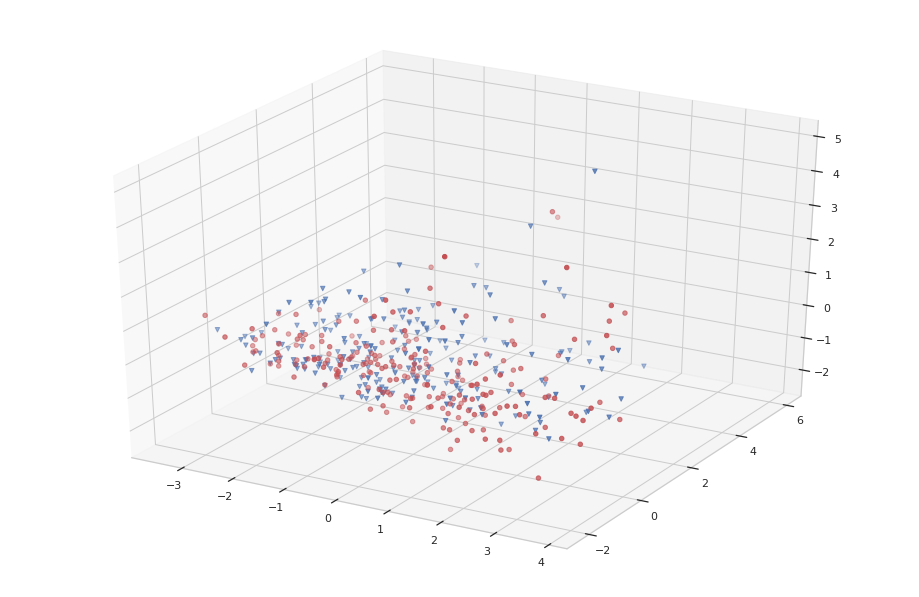

In [150]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='zdrowy']['A'],
           X[X['Status']=='zdrowy']['B'],
           X[X['Status']=='zdrowy']['C'],
           c='r',
           marker='o',)
ax.scatter(X[X['Status']=='chory']['A'],
           X[X['Status']=='chory']['B'],
           X[X['Status']=='chory']['C'],
           c='b',
           marker='v',)
plt.show()

# Dummy variables

We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [101]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [102]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [103]:
allpatients['Chory'] = status
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Chory
0,1.455396,-1.031616,1.099254,0.860123,0.334277,1
1,-1.726739,1.212535,-1.261976,-0.857562,-1.425073,1
2,1.198139,-0.165939,0.753689,0.747836,0.605368,0
3,-1.075967,0.983952,-0.572069,-0.994524,-0.025191,1
4,1.824360,-1.806344,0.686422,2.346751,-0.779932,1


# Logistic regression algorithm

# Train test split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['SKEWNESS','Chory'],axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Training and predicting

In [106]:
from sklearn.linear_model import LogisticRegression

In [115]:
logModel = LogisticRegression(max_iter=1000, C = 0.01)
logModel.fit(X_train, y_train)

/home/barti/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        45
           1       0.57      0.63      0.60        43

   micro avg       0.59      0.59      0.59        88
   macro avg       0.59      0.59      0.59        88
weighted avg       0.59      0.59      0.59        88



In [151]:
print(confusion_matrix(y_test,prediction))

[[25 20]
 [16 27]]


# Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
clf = RandomForestClassifier(n_estimators=100)

In [155]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
prediction = clf.predict(X_test)

# Evaluation

In [157]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60        45
           1       0.57      0.53      0.55        43

   micro avg       0.58      0.58      0.58        88
   macro avg       0.58      0.58      0.58        88
weighted avg       0.58      0.58      0.58        88



In [158]:
print(confusion_matrix(y_test, prediction))

[[28 17]
 [20 23]]


In [159]:
clf.feature_importances_

array([0.24871235, 0.22544747, 0.24429811, 0.28154207])